<a href="https://colab.research.google.com/github/rabina302/StarredPaperMaster/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, GRU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/StarredPaper/Data/metamap_data.csv')
data.head()

,label,aapp,acab,acty,aggp,amas,amph,anab,anim,anst,...,shro,socb,sosy,spco,tisu,tmco,topp,virs,vita,vtbt
0,Fake,1,0,3,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,Fake,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Fake,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,Fake,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,Fake,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Convert labels to lowercase
data['label'] = data['label'].str.lower()

# Drop rows with missing label values
data.dropna(subset=['label'], inplace=True)

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [ ]:
# Split data into features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:

# Reshape input data to be 3-dimensional
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
from tensorflow.keras.layers import GRU, Dropout
# Define the model architecture
model = Sequential()
model.add(GRU(units=100, return_sequences=True, input_shape=(1, X_train.shape[1])))
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=25))
model.add(Dropout(0.2))
model.add(Dense(units=10))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 100)            68700     
                                                                 
 gru_1 (GRU)                 (None, 1, 50)             22800     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 gru_2 (GRU)                 (None, 25)                5775      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense (Dense)               (None, 10)                260       
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
13/13 [==============================] - 9s 115ms/step - loss: 1.0157 - accuracy: 0.5081 - val_loss: 0.7119 - val_accuracy: 0.5029
Epoch 2/100
13/13 [==============================] - 0s 12ms/step - loss: 0.6365 - accuracy: 0.6075 - val_loss: 0.6463 - val_accuracy: 0.6272
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 0.6097 - accuracy: 0.6509 - val_loss: 0.6069 - val_accuracy: 0.6879
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 0.5491 - accuracy: 0.7180 - val_loss: 0.5955 - val_accuracy: 0.7254
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 0.5213 - accuracy: 0.7727 - val_loss: 0.6679 - val_accuracy: 0.7543
Epoch 6/100
13/13 [==============================] - 0s 14ms/step - loss: 0.4892 - accuracy: 0.7776 - val_loss: 0.5659 - val_accuracy: 0.7428
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 0.4696 - accuracy: 0.8161 - val_loss: 0.6838 - val_accuracy: 0.7803
Epoch

In [ ]:
# Predict probabilities
y_pred_probs = model.predict(X_test_reshaped)

# Convert probabilities to class predictions
y_pred_classes = (y_pred_probs > 0.5).astype(int)

11/11 [==============================] - 11s 8ms/step


Accuracy: 0.7658959537572254
Precision: 0.7627118644067796
Recall: 0.7758620689655172
F1 Score: 0.7692307692307694


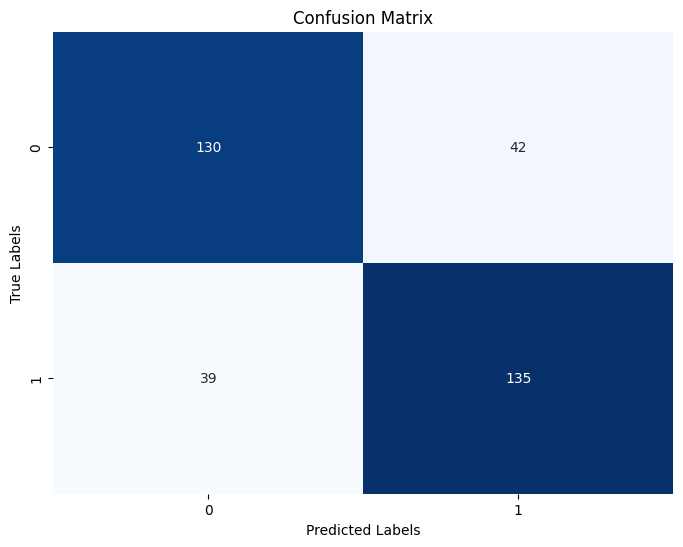

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

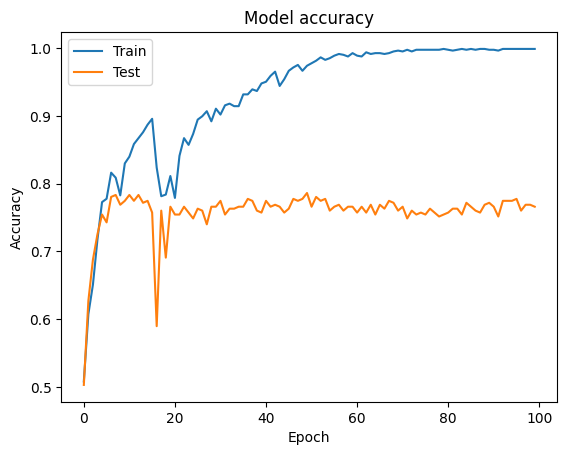

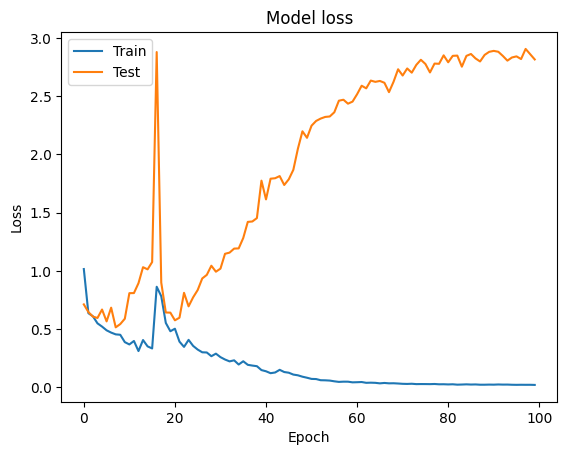

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()